In [2]:
import logging
import numpy as np
import pandas as pd
import os
import sys
import PIL
# gain access to src files
sys.path.append(os.path.join('../src'))
from utils.definitions import ROOT_DIR
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import pandas as pd
from IPython.display import clear_output
from time import sleep

getting train and test data


Hello
float32
(513, 513, 3)


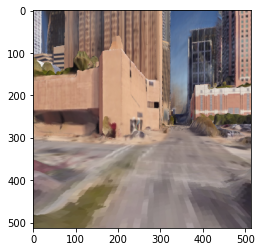

In [3]:
# logging.basicConfig(level=logging.INFO)
data_dir = str(ROOT_DIR) + '/data/farsight/'

def get_train_test():
    """ returns train test split defined by text files in farsight paper
    """
    logger = logging.getLogger(__name__)
    logger.warning('getting train and test data')
    # load image as pixel array
    data = image.imread(os.path.join(data_dir, 'img/houston_1_4_H_-16_000034.png'))
    # summarize shape of the pixel array
    print(data.dtype)
    print(data.shape)
    # display the array of pixels as an image
    pyplot.imshow(data)
    pyplot.show()


if __name__ == '__main__':
    print('Hello')
    get_train_test()

In [34]:
class DataLoader():
    def __init__(self, path=data_dir,mode='train'):
        self.path = path
        self.set_mode(mode)
    
    def read_image(self, path, depth=False):
        if depth == True:
            img_type = 'depth/'
        else:
            img_type = 'img/'
        return image.imread(os.path.join(data_dir, img_type, path))
    
    def get_data(self):
        fn = os.path.join(data_dir, self.mode + '.txt')
        imgs = []
        img_depths = []
        locs =[]
        img_names = []
#         with open(fn,'r') as f:
        
        for i,img_path in enumerate(os.listdir(os.path.join(data_dir,'img'))):
#             if i > 50:
#                 break
            img_path = img_path.strip('\n')
            imgs.append(self.read_image(img_path))
            img_depths.append(self.read_image(img_path, depth=True))
            locs.append(img_path.split('_')[0])
            img_name = img_path.strip('.png')
            img_names.append(img_name)
            if i%10==0:
                logging.warning('read %d images' % i)
        print('finished')
        return imgs, img_depths, locs, img_names
    
    def set_mode(self,mode):
        mode = mode.lower()
        if mode == 'train' or mode == 'test':
            self.mode = mode
        else:
            print('mode %s doesn\'t exist. enter train or test.' % mode)


In [35]:
dl = DataLoader()
imgs, img_depths, locs, img_names = dl.get_data()

finished


In [29]:
def show_pair(i=0):
    pyplot.imshow(img_depths[i])
    pyplot.title(img_names[i])
    pyplot.show()
    pyplot.imshow(imgs[i])

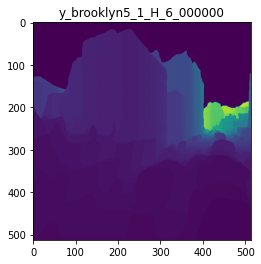

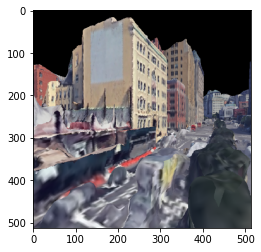

In [37]:
show_pair(500)

In [78]:
imgs_flat = []
for i, img in enumerate(imgs):
    if i>20:
        break
#         print('finished %i imgs' % i)
    imgs_flat.append(img.flatten())

In [79]:
depth_flat = []
for i, d in enumerate(img_depths):
    if i>20:
        break
    depth_flat.append(d.flatten())

In [81]:
len(imgs_flat)

21

In [82]:
imgs, img_depths, locs, img_names
d = {'name': img_names[:21], 'image': imgs_flat, 'depth': depth_flat}

In [83]:
df = pd.DataFrame(d)
df.head()

,name,image,depth
0,houston_1_1_H_-16_000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,houston_1_1_H_-16_000001,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,houston_1_1_H_-16_000002,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,houston_1_1_H_-16_000003,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,houston_1_1_H_-16_000004,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [90]:
# df.set_index('name',inplace=True)
df.head()

,image,depth
name,,
houston_1_1_H_-16_000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
houston_1_1_H_-16_000001,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
houston_1_1_H_-16_000002,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
houston_1_1_H_-16_000003,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
houston_1_1_H_-16_000004,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [111]:
np.savetxt('np.csv', df['image'].to_numpy(), delimiter=',')
df['image'].to_numpy()
# ['%.3e + %.3ej', '(%.15e%+.15ej)']

array([array([0.       , 0.       , 0.       , ..., 0.7137255, 0.6509804,
       0.5882353], dtype=float32),
       array([0.        , 0.        , 0.        , ..., 0.80784315, 0.7254902 ,
       0.6509804 ], dtype=float32),
       array([0.       , 0.       , 0.       , ..., 0.8117647, 0.7294118,
       0.654902 ], dtype=float32),
       array([0.        , 0.        , 0.        , ..., 0.8117647 , 0.72156864,
       0.654902  ], dtype=float32),
       array([0.        , 0.        , 0.        , ..., 0.7647059 , 0.6901961 ,
       0.63529414], dtype=float32),
       array([0.        , 0.        , 0.        , ..., 0.44313726, 0.40392157,
       0.41568628], dtype=float32),
       array([0.        , 0.        , 0.        , ..., 0.22352941, 0.21960784,
       0.2901961 ], dtype=float32),
       array([0.        , 0.        , 0.        , ..., 0.27058825, 0.25882354,
       0.32941177], dtype=float32),
       array([0.        , 0.        , 0.        , ..., 0.33333334, 0.30980393,
       0.3098

In [87]:
df.to_csv('flattened.csv')

In [98]:
filedf = pd.read_csv('data.csv',index_col='name')

In [100]:
filedf.head()

,Unnamed: 0,image,depth
name,,,
houston_1_1_H_-16_000000,0,[[[0. 0. 0. ]\n [0. ...,[[0. 0. 0. ... 0. ...
houston_1_1_H_-16_000001,1,[[[0. 0. 0. ]\n [0. ...,[[0. 0. 0. ... 0. ...
houston_1_1_H_-16_000002,2,[[[0. 0. 0. ]\n [0. ...,[[0. 0. 0. ... 0. ...
houston_1_1_H_-16_000003,3,[[[0. 0. 0. ]\n [0. ...,[[0. 0. 0. ... 0. ...
houston_1_1_H_-16_000004,4,[[[0. 0. 0. ]\n [0. ...,[[0. 0. 0. ... 0. ...


TypeError: Image data of dtype <U1385 cannot be converted to float

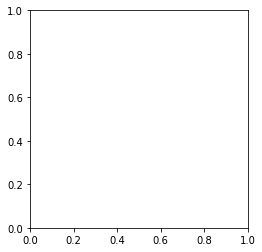

In [58]:
pyplot.imshow(filedf.image[1])